# Designing a promo strategy for a drinks company

## 📖 Context
Our company owns a chain of stores across Russia that sell a variety of alcoholic drinks. We recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.


## Introduction

Alcohol consumption in Russia is one of the highest in the world. According to the WHO, in 2019 alcohol consumption decreased and the average alcohol consumption in Russia was less than 10 liters per person per year. Russia excels especially in the high consumption of the high volume of spirits compared with other alcoholic drinks (such as wine or beer).([1]Wikipedia)

When analyzing shopping habits, we will assume that many things influence shopping behavior and customer patterns. Buying patterns refer to the why and how behind consumer purchase decisions. They are habits and routines that consumers establish through the products and services they buy. Buying patterns are defined by the frequency, timing, quantity, etc. of said purchases. These formulas can be determined by factors for example:
Where someone lives, work. How much money they make.
What their friends and family recommend.
The price of the product or service they're interested in (and any active sales or discounts) and others.([2]Decker, 2020)

When searching for regions to recommend, we'll analyze the annual frequency and volume of sales of alcoholic drinks.

## Purpose of the analysis and research questions
The purpose of the analysis is to recommend another 10 regions where wine promotion could be as successful as in St. Petersburg.

However, we have only a limited dataset for analyzing customers' shopping habits. Based on the dataset we have, we can analyze the following questions:

**1. Is St. Petersburg one of the regions with the highest volume of wine sold?**

**2. Is there a relationship between the sale of wine and other alcoholic drinks?**

**3. Which regions are suitable for similar wine promotion?**


### The data
The marketing team has provided historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita


In [82]:
# installation of libraries
!pip install missingno


  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached numpy-1.22.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached Pillow-9.0.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.31.2-py3-none-any.whl (899 kB)
  Using cached kiwisolver-1.4.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached pandas-1.4.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached pytz-2022.1-py

In [83]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Load data from the csv file
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
print(df.head())
# Set up seaborn 
sns.set_context('talk')

   year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2


#### 1) Summary of the dataset information

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


Now, we know the contents of the dataset and the data types. We can already see here that **dataset contains missing values.** In the next steps, we'll clean the dataset of duplications and verify another suitable procedure with missing values.

#### 2) Verification of duplicate values in the dataset

In [85]:
df.duplicated().sum()

0

**The dataset contains no duplicate values.**

#### 3) Verification of missing values in the dataset

In [86]:
# missing values
df.isnull().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

Count of missing values is considerable. The reasons for the missing data should be explored more. Let's start by visualizing the missing values in the dataset.

<AxesSubplot:>

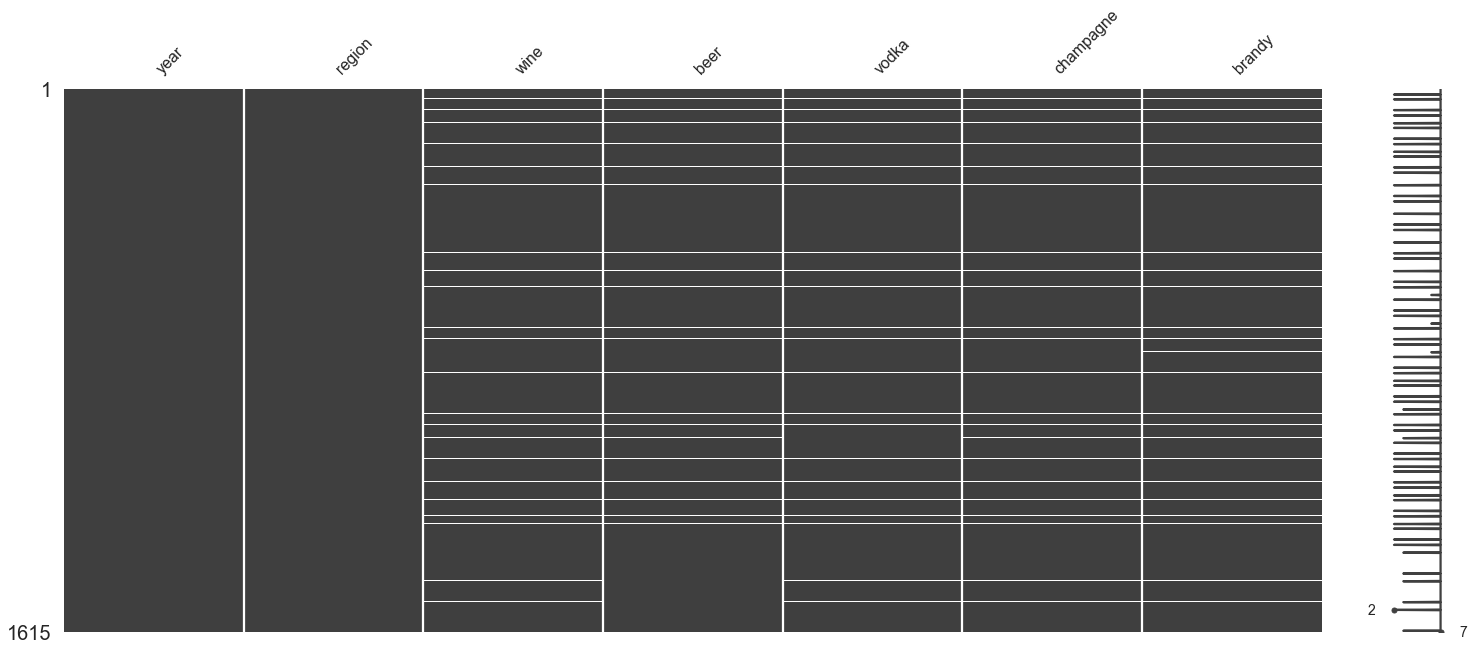

In [87]:
# View of a matrix of missing values in a dataset.
msno.matrix(df)

In the matrix of missing values we see that the vast majority of missing values occur in the same rows. We will try to see where the missing values occur by region.

In [88]:
# We set a filter for empty rows and then find out the count of missing values by region.
df_miss = df[df.brandy.isnull() == True]
print(df_miss.groupby(by=['region']).count())

                        year  wine  beer  vodka  champagne  brandy
region                                                            
Chechen Republic          19     0     3      0          0       0
Republic of Crimea        16     0     0      0          0       0
Republic of Ingushetia    15     3     5      5          3       0
Sevastopol                16     0     0      0          0       0


As a result, we see that missing values occur in four regions. The Count of recorded values in these regions is zero or very low. **In this case, the missing values are not suitable for filling with the average value. Therefore, we remove the rows with the missing value.**

Already during the verification of the missing values, it was possible to evaluate that the residual values will remain in the dataset after remove of null rows. This data will need to be removed to keep the count of values for the regions the same.

In [89]:
# remove missing values in rows and description datasets
df.dropna(inplace=True)
print(df.info())

# verification the count of values for all regions
print(df['region'].value_counts(ascending=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1549 non-null   int64  
 1   region     1549 non-null   object 
 2   wine       1549 non-null   float64
 3   beer       1549 non-null   float64
 4   vodka      1549 non-null   float64
 5   champagne  1549 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.8+ KB
None
Sevastopol                     3
Republic of Crimea             3
Republic of Ingushetia         4
Sakhalin Oblast               19
Saratov Oblast                19
                              ..
Republic of Karelia           19
Karachay-Cherkess Republic    19
Kamchatka Krai                19
Republic of Kalmykia          19
Nizhny Novgorod Oblast        19
Name: region, Length: 84, dtype: int64


The result is what we saw when we were looking for the missing values. The values for the regions of Republic of Ingushetia, Republic of Crimea and Sevastopol remained in the dataset. We'll remove these regions from the dataset.

In [90]:
# Remove incomparable values from a dataset
Sevastapol = df[df["region"] == 'Sevastopol']
Republic_Crimea = df[df["region"] == 'Republic of Crimea']
Republic_Ing = df[df["region"] == 'Republic of Ingushetia']

df.drop(Sevastapol.index, axis=0, inplace=True)
df.drop(Republic_Crimea.index, axis=0, inplace=True)
df.drop(Republic_Ing.index, axis=0, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1539 non-null   int64  
 1   region     1539 non-null   object 
 2   wine       1539 non-null   float64
 3   beer       1539 non-null   float64
 4   vodka      1539 non-null   float64
 5   champagne  1539 non-null   float64
 6   brandy     1539 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.2+ KB


#### 4) Identifying Outliers
We identify outliers using boxplot visualization.

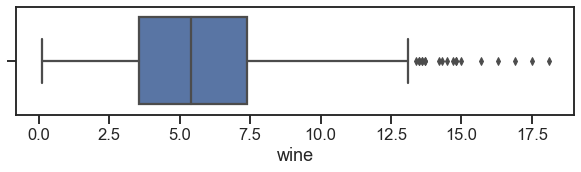

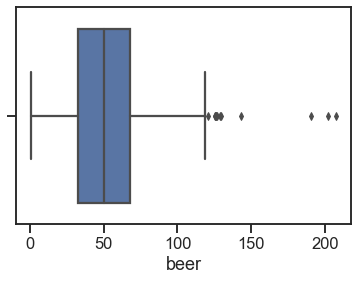

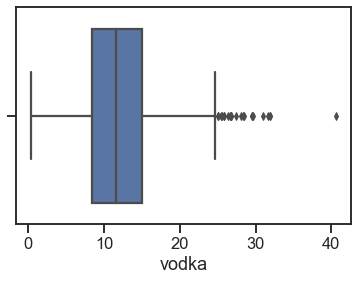

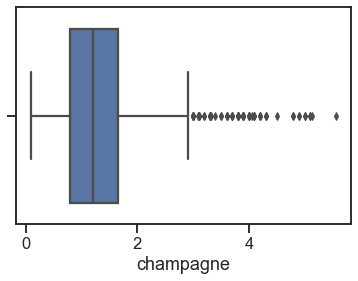

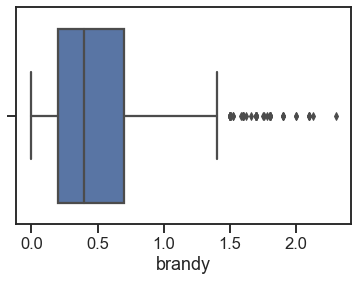

In [91]:
# create a boxplot for each type of alcohol
plt.figure(figsize=(10,2))
sns.boxplot(x='wine', data=df)
plt.show()
sns.boxplot(x='beer', data=df)
plt.show()
sns.boxplot(x='vodka', data=df)
plt.show()
sns.boxplot(x='champagne', data=df)
plt.show()
sns.boxplot(x='brandy', data=df)
plt.show()
sns.set_theme(style="ticks")

We see that there are outliers in the datasets. For vodka, one value of 40l per person per year is a high value, but not impossible. There are also three outliers values for beer. **We could filter outliers, but due to their range, aren't extreme values.**

#### 5) Data exploratory analysis

Now we know, that the dataset no longer contains rows with missing values and the region values are comparable.


In [92]:
# Data preparation

# Column selection
alcohol = ['wine', 'beer', 'vodka', 'champagne', 'brandy']


# New column total alcohol
df['total_alc'] = df['wine'] + df['beer'] + df['vodka'] + df['champagne'] + df['brandy']

# Set index
df.set_index('year')
                                                                               
# Subset Sain Petersburg
df_Petersburg = df[df["region"] == "Saint Petersburg"].set_index('year')                                                                          
                                                                               

In [93]:
# Summary description of datasets
print(df[alcohol].describe())
# We'll also find out how many regions we'll evaluate
print(len(df["region"].unique()))

              wine         beer        vodka    champagne       brandy
count  1539.000000  1539.000000  1539.000000  1539.000000  1539.000000
mean      5.637544    51.722190    11.902404     1.315172     0.524185
std       2.811555    25.115577     5.078808     0.798462     0.399331
min       0.100000     1.000000     0.400000     0.100000     0.000000
25%       3.550000    32.700000     8.400000     0.800000     0.200000
50%       5.400000    50.300000    11.600000     1.200000     0.400000
75%       7.400000    67.500000    15.000000     1.660000     0.700000
max      18.100000   207.300000    40.600000     5.560000     2.300000
81


In the description of datasets, we see that on average, beer is sold the most in the analyzed regions. Vodka is in second place and wine is third in average annual sales per capita. 

We've now 81 unique regions in the dataset.

Next, we use the Pearson correlation coefficient. The correlation between the measured values is a measure of how well they are related.

##### 5a) Relationships between alcohol drinks sold

In [94]:
# Pearson correlation coefficient
df[alcohol].corr()

,wine,beer,vodka,champagne,brandy
wine,1.000000,0.492961,0.275680,0.467464,0.557594
beer,0.492961,1.000000,0.181542,0.452165,0.473509
vodka,0.275680,0.181542,1.000000,0.267957,0.226268
champagne,0.467464,0.452165,0.267957,1.000000,0.782892
brandy,0.557594,0.473509,0.226268,0.782892,1.000000


The resulting relationships by coefficient show the strongest relationship between brandy and champagne. The lowest correlation values are generally for vodka. **Wine is more strongly related to brandy, champagne or beer. This could mean that customers who are also buying brandy, champagne or  beer are more likely to buy wine.**

##### 5b) In which regions is wine sales the highest. Is St. Petersburg one of these regions?

<AxesSubplot:title={'center':'20 regions with the highest average annual wine sales per capita'}, xlabel='region'>

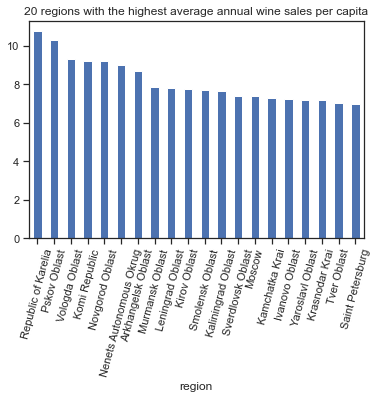

In [95]:
# We calculate average sales by region
mean_sale = df.groupby(by=['region']).mean()
# We sort the dataset
mean_sale.sort_values("wine", ascending=False, inplace=True)
mean_sale['wine'].sort_values(ascending=False).head(20).plot(kind="bar", title="20 regions with the highest average annual wine sales per capita", rot=75)


In [96]:
# Average annual alcohol sales per capita for St. Petersburg only
print(df_Petersburg[alcohol].describe())

            wine        beer      vodka  champagne     brandy
count  19.000000   19.000000  19.000000  19.000000  19.000000
mean    6.952632   84.375263  11.821579   2.468947   1.117368
std     2.167018   35.468115   3.580466   0.522057   0.353174
min     2.600000   27.900000   6.300000   1.200000   0.500000
25%     6.250000   50.800000   8.805000   2.350000   0.900000
50%     7.100000  101.000000  12.500000   2.500000   1.130000
75%     8.150000  106.000000  14.500000   2.755000   1.300000
max    10.400000  143.000000  17.200000   3.600000   2.100000


**As a result, we see that the average wine sales in St. Petersburg aren't among the highest.**

However, in comparison with the average sales of alcoholic drinks in all regions, St. Petersburg is above average. Especially in the sale of beer.

**It could be assumed that in regions with the same or lower sales of wine per capita, the promotion could also be successful.** However, it is also necessary to consider the impact of the development of wine sales over time and the possible relationships between sales of other alcoholic drinks.

In [97]:
# Pearson correlation coefficient
df_Petersburg[alcohol].corr()

,wine,beer,vodka,champagne,brandy
wine,1.000000,0.415810,-0.150376,0.743047,0.842235
beer,0.415810,1.000000,0.528265,0.536662,0.389906
vodka,-0.150376,0.528265,1.000000,-0.062212,-0.225856
champagne,0.743047,0.536662,-0.062212,1.000000,0.743209
brandy,0.842235,0.389906,-0.225856,0.743209,1.000000


**In evaluating the relationship between alcoholic drinks only in St. Petersburg, we also see a strong relationship wine between champagne and brandy.**

##### 5c) Total alcohol and wine sales in St. Petersburg
Let's look at the development of total alcohol and wine sales over time and the relationship with the sale of other alcoholic drinks in St. Petersburg.

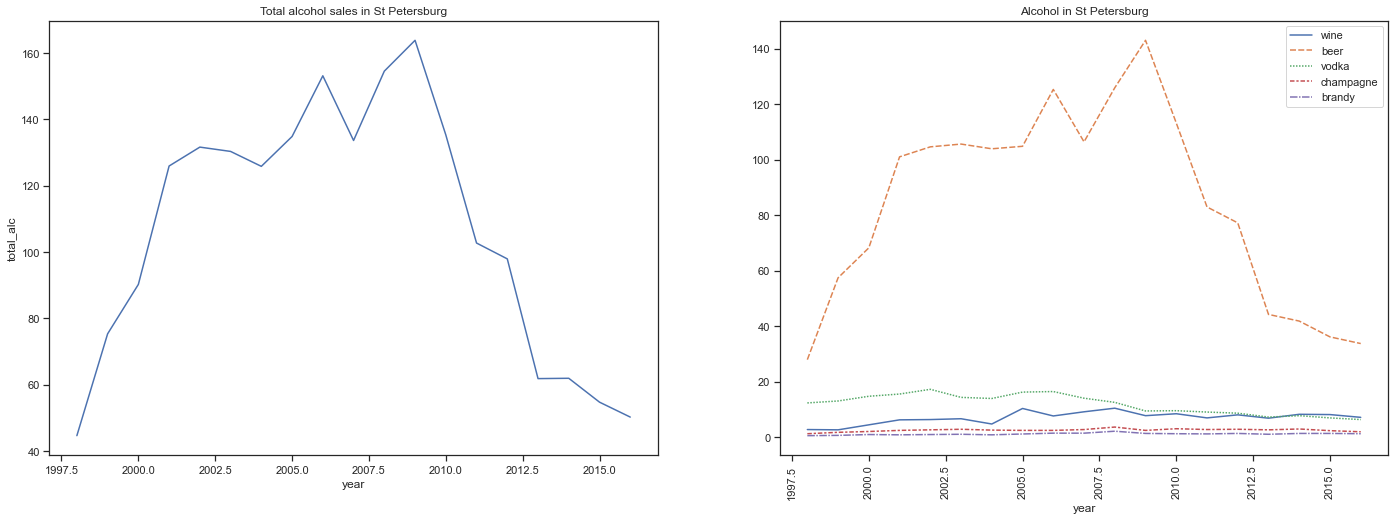

In [98]:
# Consumption share
for alc in alcohol:
    df_Petersburg[alc + '_shr'] = df_Petersburg.apply(lambda x: x[alc] / x.total_alc, axis=1)

# Visualization

f, axs = plt.subplots(1, 2, figsize=(24, 8), gridspec_kw=dict(width_ratios=[4, 4]))
# Total alcohol sales in St Petersburg 
h = sns.lineplot(data=df_Petersburg['total_alc'], legend=True, ax=axs[0])
h.set_title("Total alcohol sales in St Petersburg")

# Alcohol in St Petersburg
g = sns.lineplot(data=df_Petersburg[alcohol], legend=True, ax=axs[1])
g.set_title('Alcohol in St Petersburg')
g = plt.xticks(rotation=90)
 

And only the development over time for the sale of wine in St. Petersburg:

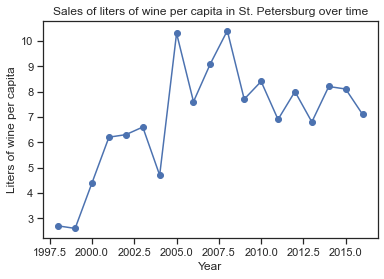

In [99]:
# Using a line graph
df_Petersburg.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.plot(df_Petersburg["year"], df_Petersburg["wine"], marker="o")
ax.set_title("Sales of liters of wine per capita in St. Petersburg over time")
ax.set_xlabel("Year")
ax.set_ylabel("Liters of wine per capita")
plt.show()

- **Highest alcohol consumption in St. Petersburg peaked in 2010.**

- Beer had the highest share in consumption and also had the highest impact on overall alcohol consumption.

- We can see that beer consumption has dropped significantly since 2010. The decrease in consumption is also visible for vodka.

- **Since 2010, wine consumption in St. Petersburg has stabilized at 7-8 liters per capita.**

#### 6) Clusters and visualizations
We will use the creation of clusters to select regions with similar alcohol consumption as in St. Petersburg. We'll limit the scope of data from 2010. The last five years will provide us with up-to-date information on consumer consumption habits for comparison.

In [100]:
# dataset reduction
df2010 = df[df["year"] >= 2010] 

# Load packages
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# selection of features
features_df = df2010[alcohol]

# StandardScaler - standardize the data set for normal distribution
scaler = StandardScaler()
scaler.fit(features_df)
StandardScaler(copy=True, with_mean=True, with_std=True)
features_scaled=scaler.transform(features_df)
print(features_scaled)

[[-0.10151812 -1.33775288 -0.6431291  -0.02425053  0.6098909 ]
 [-0.95348898 -0.02681568  0.1463259  -0.1402847  -0.83368306]
 [ 0.46646245  0.77404778  0.59039435 -0.02425053 -0.35249174]
 ...
 [-0.8723489  -0.16505996 -0.2484016   0.20781781 -0.5930874 ]
 [-0.79120882  0.77404778 -0.2484016   0.09178364  1.33167788]
 [ 1.52128352 -1.02789499 -0.07570832 -0.25631886  0.6098909 ]]


in processing...

#### 7) Summary 


After cleaning up the data, we examined the relationships between the alcoholic beverages sold throughout the data set.
We have found that customers who buy champagne and brandy also buy wine more often.

We also found that even though St. Petersburg is not among the regions with the highest wine sales, the promotion was still successful. St. Petersburg is in 20th place in wine sales.

When we surveyed wine sales in St. Petersburg over time, we found that at the beginning of the period under review, sales were very low but increasing. In the last five years, wine sales have ranged from 7 to 8 liters per capita.

When analyzing the relationship between alcoholic drinks only in St. Petersburg, we again found a very strong relationship between the sale of wine and champagne and brandy.

We used to select suitable regions where the marketing campaign could be similarly successful... in processing...

## The Result
And finally, the answers to our exploratory questions:

**1. Is St. Petersburg one of the regions with the highest volume of wine sold?**

No, St. Petersburg is in 20th place in wine sales. Yet, the promotion was successful.

**2. Is there a relationship between the sale of wine and other alcoholic drinks?**

Yes, we used Pearson's correlation coefficient to verify the relationships in the full dataset. Then also only for St. Petersburg. For our purposes, we found a strong relationship between wine, champagne and brandy sales, especially in the St. Petersburg dataset.

**3. Which regions are suitable for similar wine promotion?**

in processing...

### Reference

[1] Wikipedia, 29.10.2010. Available from: https://en.wikipedia.org/wiki/Alcohol_consumption_in_Russia

[2] Allie Decker, 2020, How to Predict and Analyze Your Customers’ Buying Patterns. Available from: https://blog.hubspot.com/marketing/buying-patterns 

[3] Wikipedia, 31.10.2021. Available from: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient